# Visual story telling part 2: Capital Metro data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('capmetro_UT.csv')
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [4]:
df.describe()

,boarding,alighting,temperature,hour_of_day
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,51.511676,47.646291,69.282473,13.500000
std,48.820284,50.069866,13.540249,4.610168
min,0.000000,0.000000,29.180000,6.000000
25%,13.000000,13.000000,59.195000,9.750000
50%,33.000000,28.000000,72.750000,13.500000
75%,79.250000,64.000000,79.290000,17.250000
max,288.000000,304.000000,97.640000,21.000000


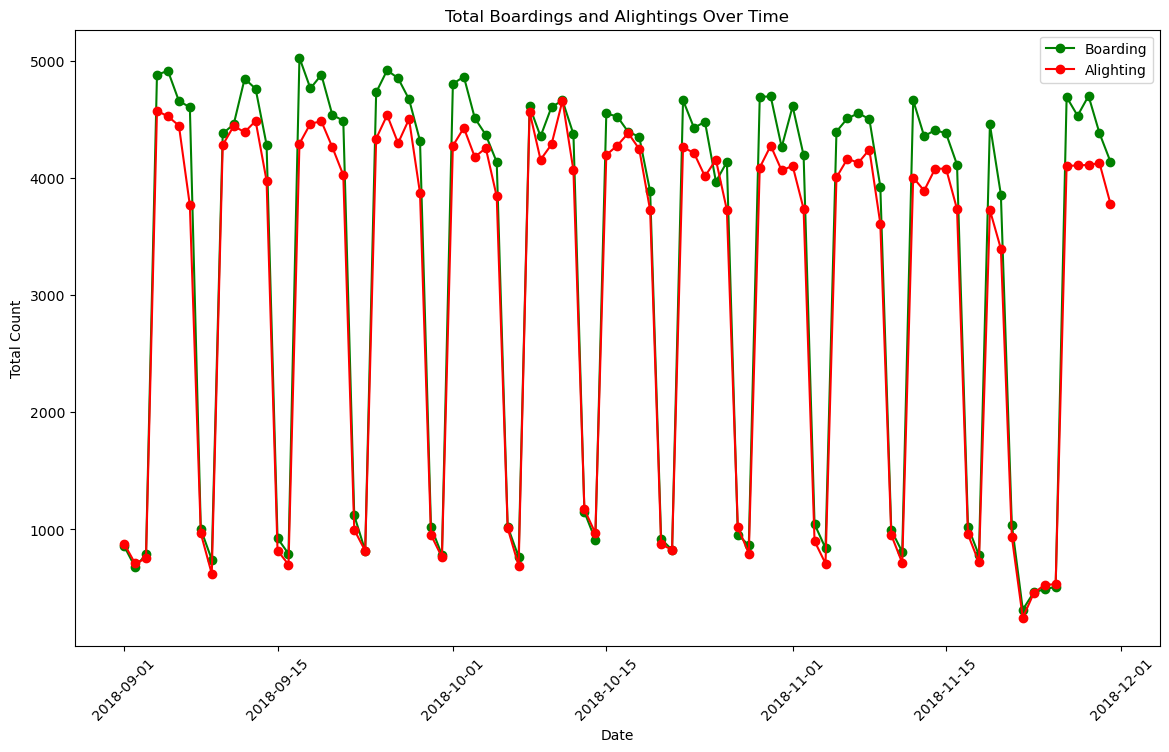

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

# group by the date and sum the boardings and alightings
daily_totals = df.groupby('date').agg({'boarding': 'sum', 'alighting': 'sum'}).reset_index()

#plot
plt.figure(figsize=(14, 8))
plt.plot(daily_totals['date'], daily_totals['boarding'], color='green', marker='o', label='Boarding')
plt.plot(daily_totals['date'], daily_totals['alighting'], color='red', marker='o', label='Alighting')

plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Total Boardings and Alightings Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.show()

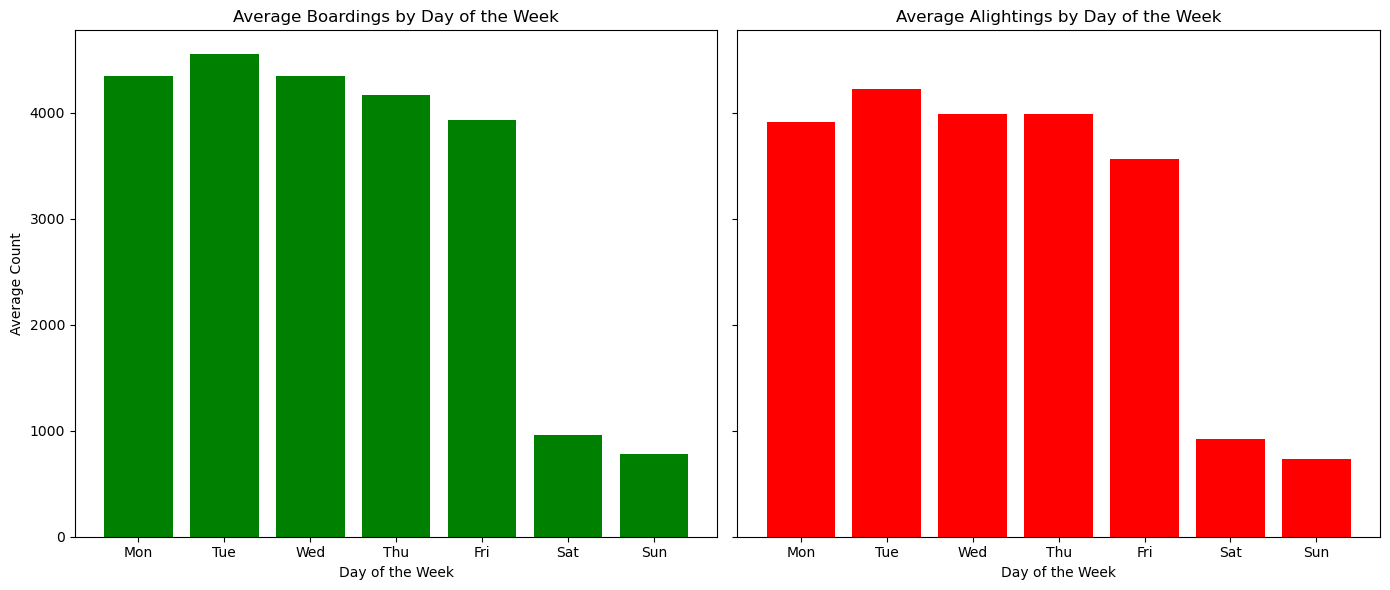

In [71]:
# group by date and sum boardings and alightings
daily_totals = df.groupby('date').agg({'boarding': 'sum', 'alighting': 'sum', 'day_of_week': 'first'}).reset_index()

# group by day_of_week and calculate the average boardings and alightings
average_counts = daily_totals.groupby('day_of_week').agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()

#sort
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
average_counts['day_of_week'] = pd.Categorical(average_counts['day_of_week'], categories=days_order, ordered=True)
average_counts = average_counts.sort_values('day_of_week')

#plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# boardings
axes[0].bar(average_counts['day_of_week'], average_counts['boarding'], color='green')
axes[0].set_title('Average Boardings by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Count')

# alightings
axes[1].bar(average_counts['day_of_week'], average_counts['alighting'], color='red')
axes[1].set_title('Average Alightings by Day of the Week')
axes[1].set_xlabel('Day of the Week')

plt.tight_layout()
plt.show()

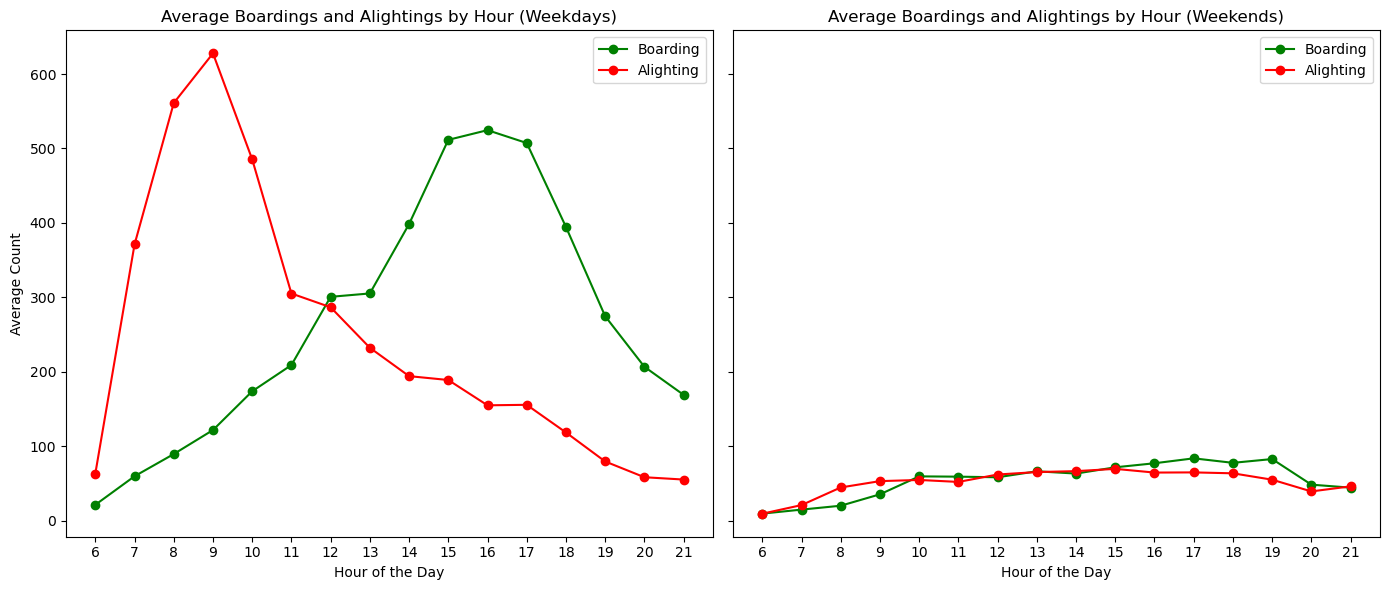

In [28]:
# get the date and hour from the timestamp
df['date'] = df['timestamp'].dt.date
df['hour_of_day'] = df['timestamp'].dt.hour

# group by date and hour_of_day, summing boardings and alightings
hourly_totals = df.groupby(['date', 'hour_of_day', 'weekend']).agg({'boarding': 'sum', 'alighting': 'sum'}).reset_index()

# get the average for each hour on weekdays and weekends
average_hourly_counts = hourly_totals.groupby(['hour_of_day', 'weekend']).agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()

# split the data into weekdays and weekends
weekday_data = average_hourly_counts[average_hourly_counts['weekend'] == 'weekday']
weekend_data = average_hourly_counts[average_hourly_counts['weekend'] == 'weekend']

#plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Weekday 
axes[0].plot(weekday_data['hour_of_day'], weekday_data['boarding'], color='green', marker='o', label='Boarding')
axes[0].plot(weekday_data['hour_of_day'], weekday_data['alighting'], color='red', marker='o', label='Alighting')
axes[0].set_title('Average Boardings and Alightings by Hour (Weekdays)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Count')
axes[0].set_xticks(range(6,22)) 
axes[0].legend()

# weekend 
axes[1].plot(weekend_data['hour_of_day'], weekend_data['boarding'], color='green', marker='o', label='Boarding')
axes[1].plot(weekend_data['hour_of_day'], weekend_data['alighting'], color='red', marker='o', label='Alighting')
axes[1].set_title('Average Boardings and Alightings by Hour (Weekends)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_xticks(range(6,22)) 
axes[1].legend()

plt.tight_layout()
plt.show()

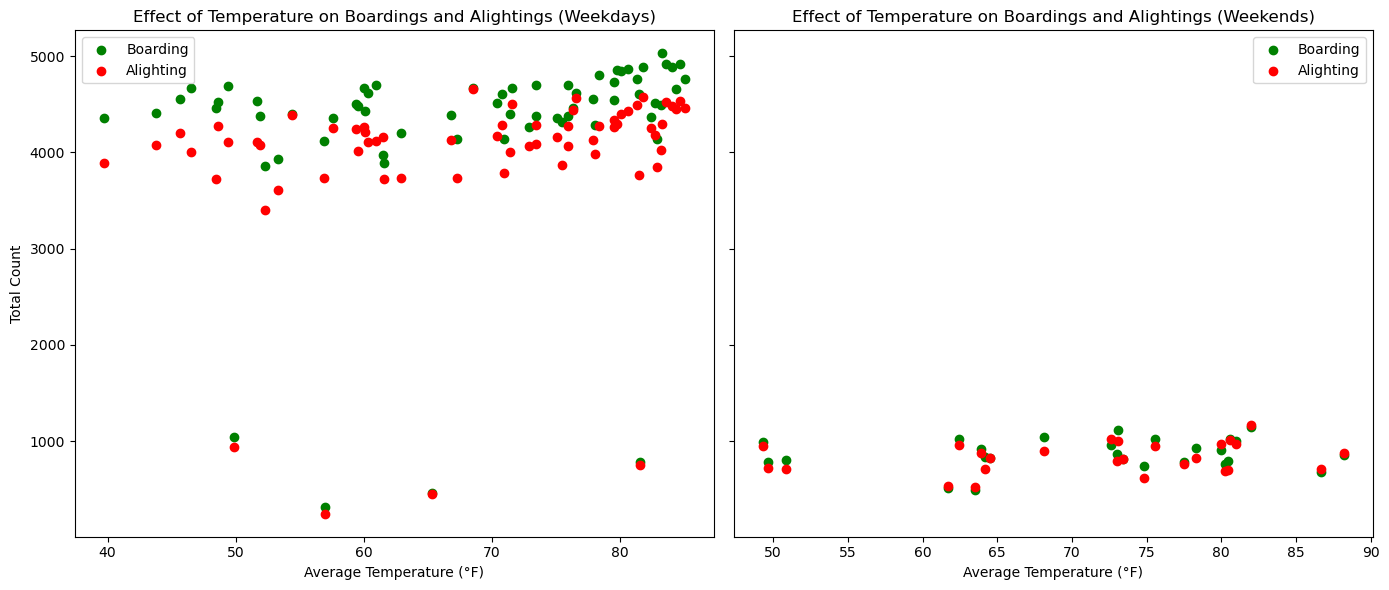

In [73]:
# group by date, summing boardings and alightings and averaging the temperature
daily_totals = df.groupby(['date', 'weekend']).agg({
    'boarding': 'sum',
    'alighting': 'sum',
    'temperature': 'mean'
}).reset_index()

# split the data into weekdays and weekends
weekday_data = daily_totals[daily_totals['weekend'] == 'weekday']
weekend_data = daily_totals[daily_totals['weekend'] == 'weekend']

#plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Weekday
axes[0].scatter(weekday_data['temperature'], weekday_data['boarding'], color='green', label='Boarding')
axes[0].scatter(weekday_data['temperature'], weekday_data['alighting'], color='red', label='Alighting')
axes[0].set_title('Effect of Temperature on Boardings and Alightings (Weekdays)')
axes[0].set_xlabel('Average Temperature (°F)')
axes[0].set_ylabel('Total Count')
axes[0].legend()

# weekend
axes[1].scatter(weekend_data['temperature'], weekend_data['boarding'], color='green', label='Boarding')
axes[1].scatter(weekend_data['temperature'], weekend_data['alighting'], color='red', label='Alighting')
axes[1].set_title('Effect of Temperature on Boardings and Alightings (Weekends)')
axes[1].set_xlabel('Average Temperature (°F)')
axes[1].legend()

plt.tight_layout()
plt.show()

C:\Users\linds\AppData\Local\Temp\ipykernel_25712\22099712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data['hour'] = weekday_data['timestamp'].dt.hour
C:\Users\linds\AppData\Local\Temp\ipykernel_25712\22099712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data['minute'] = weekday_data['timestamp'].dt.minute


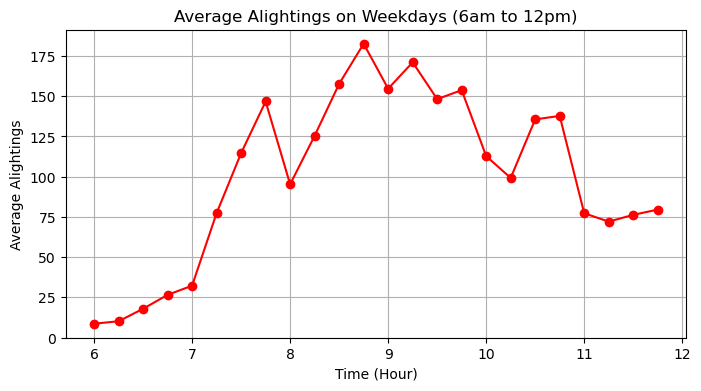

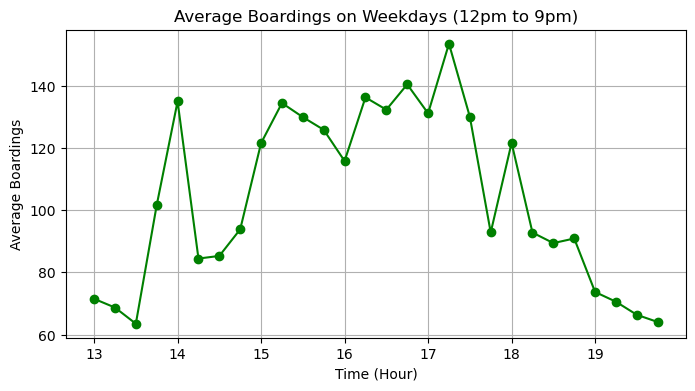

In [69]:
#filter for weekdays
weekday_data = df[df['weekend'] == 'weekday']

#get hour and minute from timestamp for grouping
weekday_data['hour'] = weekday_data['timestamp'].dt.hour
weekday_data['minute'] = weekday_data['timestamp'].dt.minute

#get the average alightings from 6am to 12pm
morning_alightings = weekday_data[(weekday_data['hour'] >= 6) & (weekday_data['hour'] < 12)]
average_morning_alightings = morning_alightings.groupby(['hour', 'minute']).agg({'alighting': 'mean'}).reset_index()

#get the average boardings from 12pm to 9pm
afternoon_boardings = weekday_data[(weekday_data['hour'] >= 13) & (weekday_data['hour'] <= 19)]
average_afternoon_boardings = afternoon_boardings.groupby(['hour', 'minute']).agg({'boarding': 'mean'}).reset_index()

# Convert hour and minute back to a timestamp-like format for plotting
average_morning_alightings['time'] = average_morning_alightings['hour'] + average_morning_alightings['minute'] / 60
average_afternoon_boardings['time'] = average_afternoon_boardings['hour'] + average_afternoon_boardings['minute'] / 60

#plot
plt.figure(figsize=(8, 4))
plt.plot(average_morning_alightings['time'], average_morning_alightings['alighting'], color='red', marker='o', label='Alightings')
plt.title('Average Alightings on Weekdays (6am to 12pm)')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Alightings')
plt.xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(average_afternoon_boardings['time'], average_afternoon_boardings['boarding'], color='green', marker='o', label='Boardings')
plt.title('Average Boardings on Weekdays (12pm to 9pm)')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Boardings')
plt.xticks(range(13, 20))  # Set x-ticks from 12pm to 9pm
plt.grid(True)
plt.show()

Something I'm noticing is how the alighting spike at the 45 minute mark - people are showing up for work that starts on the hour. Let's see if people are later for work in any given month. And let's also see if people stay later at work during a given month.

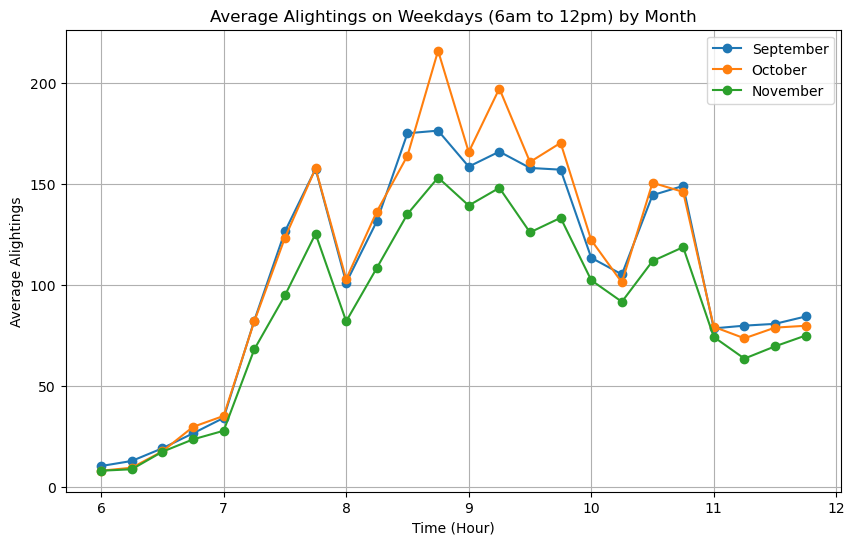

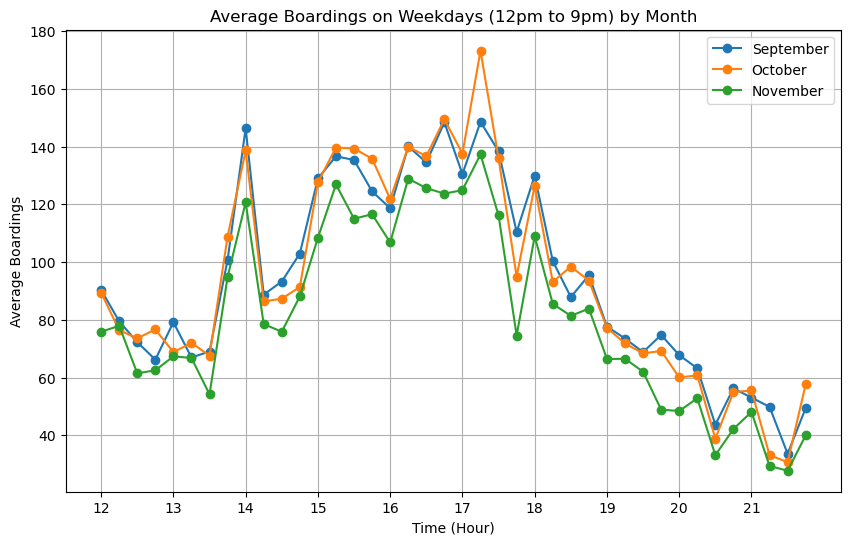

In [37]:
#relevant time information
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['month'] = df['timestamp'].dt.strftime('%B')

#months
months = ['September', 'October', 'November']

#get weekdays
weekday_data = df[df['weekend'] == 'weekday']

# morning alightings (6am to 12pm)
morning_alightings = weekday_data[(weekday_data['hour'] >= 6) & (weekday_data['hour'] < 12)]
morning_alightings_by_month = morning_alightings.groupby(['month', 'hour', 'minute']).agg({'alighting': 'mean'}).reset_index()

#afternoon boardings (12pm to 9pm)
afternoon_boardings = weekday_data[(weekday_data['hour'] >= 12) & (weekday_data['hour'] <= 21)]
afternoon_boardings_by_month = afternoon_boardings.groupby(['month', 'hour', 'minute']).agg({'boarding': 'mean'}).reset_index()

# Convert hour and minute back to a timestamp-like format for plotting
morning_alightings_by_month['time'] = morning_alightings_by_month['hour'] + morning_alightings_by_month['minute'] / 60
afternoon_boardings_by_month['time'] = afternoon_boardings_by_month['hour'] + afternoon_boardings_by_month['minute'] / 60

#plot alightings
plt.figure(figsize=(10, 6))
for month in months:
    monthly_data = morning_alightings_by_month[morning_alightings_by_month['month'] == month]
    plt.plot(monthly_data['time'], monthly_data['alighting'], marker='o', label=month)
plt.title('Average Alightings on Weekdays (6am to 12pm) by Month')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Alightings')
plt.xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
plt.legend()
plt.grid(True)
plt.show()

#plot boardings
plt.figure(figsize=(10, 6))
for month in months:
    monthly_data = afternoon_boardings_by_month[afternoon_boardings_by_month['month'] == month]
    plt.plot(monthly_data['time'], monthly_data['boarding'], marker='o', label=month)
plt.title('Average Boardings on Weekdays (12pm to 9pm) by Month')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Boardings')
plt.xticks(range(12, 22))  # Set x-ticks from 12pm to 9pm
plt.legend()
plt.grid(True)
plt.show()

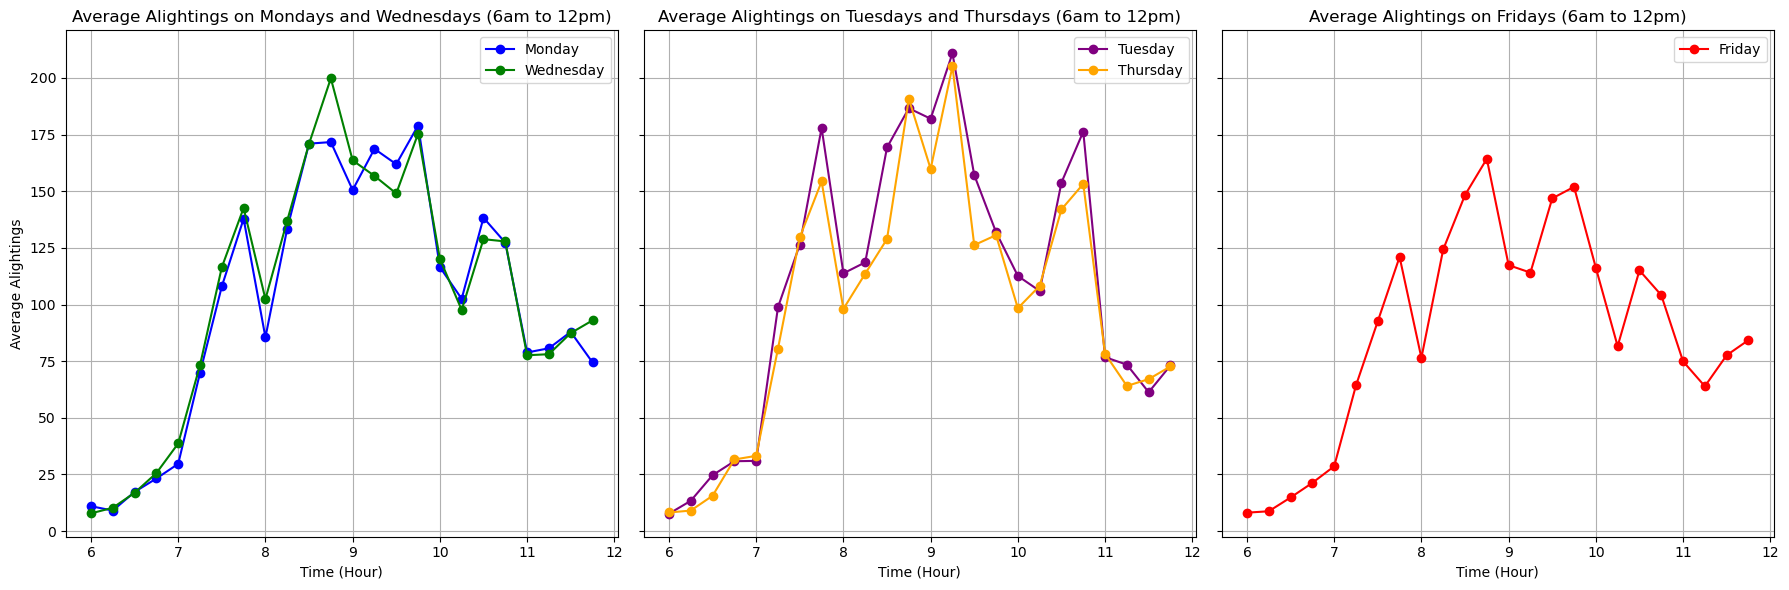

In [63]:
# Extract relevant time information
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.day_name()

# monrings on weekdays
weekday_data = df[(df['weekend'] == 'weekday') & (df['hour'] >= 6) & (df['hour'] < 12)]

# Group by weekday, hour, and minute to calculate the average alightings
morning_alightings_by_day = weekday_data.groupby(['weekday', 'hour', 'minute']).agg({'alighting': 'mean'}).reset_index()

morning_alightings_by_day['time'] = morning_alightings_by_day['hour'] + morning_alightings_by_day['minute'] / 60# Step 2: Plot the graphs side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot: Monday and Wednesday
colors_mw = {'Monday': 'blue', 'Wednesday': 'green'}
for day in ['Monday', 'Wednesday']:
    daily_data = morning_alightings_by_day[morning_alightings_by_day['weekday'] == day]
    axes[0].plot(daily_data['time'], daily_data['alighting'], marker='o', color=colors_mw[day], label=day)
axes[0].set_title('Average Alightings on Mondays and Wednesdays (6am to 12pm)')
axes[0].set_xlabel('Time (Hour)')
axes[0].set_ylabel('Average Alightings')
axes[0].set_xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
axes[0].legend()
axes[0].grid(True)

# Plot: Tuesday and Thursday
colors_tt = {'Tuesday': 'purple', 'Thursday': 'orange'}
for day in ['Tuesday', 'Thursday']:
    daily_data = morning_alightings_by_day[morning_alightings_by_day['weekday'] == day]
    axes[1].plot(daily_data['time'], daily_data['alighting'], marker='o', color=colors_tt[day], label=day)
axes[1].set_title('Average Alightings on Tuesdays and Thursdays (6am to 12pm)')
axes[1].set_xlabel('Time (Hour)')
axes[1].set_xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
axes[1].legend()
axes[1].grid(True)

# Third Plot: Friday
friday_data = morning_alightings_by_day[morning_alightings_by_day['weekday'] == 'Friday']
axes[2].plot(friday_data['time'], friday_data['alighting'], marker='o', color='red', label='Friday')
axes[2].set_title('Average Alightings on Fridays (6am to 12pm)')
axes[2].set_xlabel('Time (Hour)')
axes[2].set_xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

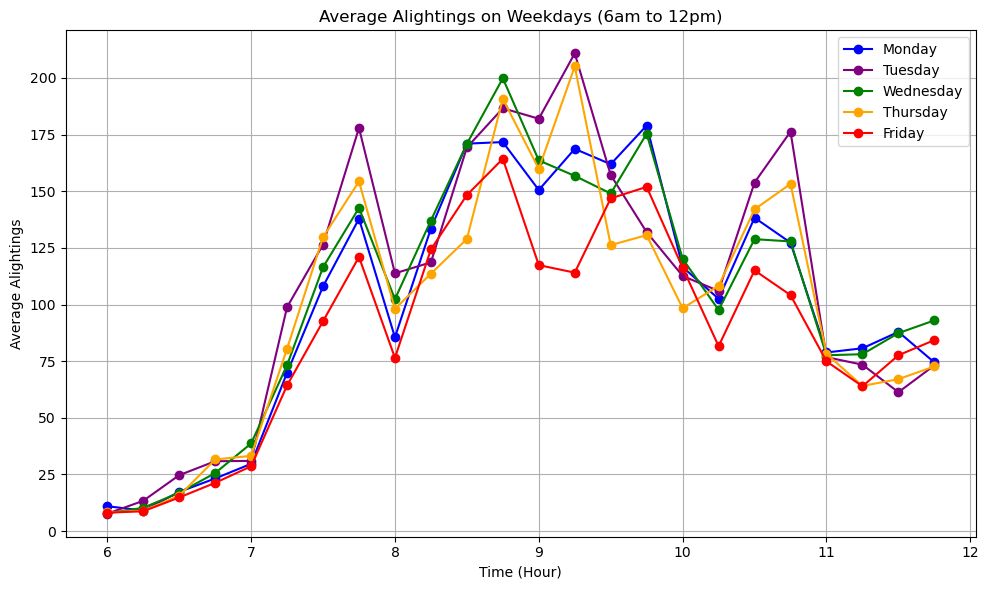

In [75]:
# Convert the timestamp to a datetime object if it isn't already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract relevant time information
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.day_name()

#mornings on weekdays
weekday_data = df[(df['weekend'] == 'weekday') & (df['hour'] >= 6) & (df['hour'] < 12)]

# Group by weekday, hour, and minute to calculate the average alightings
morning_alightings_by_day = weekday_data.groupby(['weekday', 'hour', 'minute']).agg({'alighting': 'mean'}).reset_index()

morning_alightings_by_day['time'] = morning_alightings_by_day['hour'] + morning_alightings_by_day['minute'] / 60

#colors for each weekday
colors = {
    'Monday': 'blue',
    'Tuesday': 'purple',
    'Wednesday': 'green',
    'Thursday': 'orange',
    'Friday': 'red'
}

#plot
plt.figure(figsize=(10, 6))
for day in colors.keys():
    daily_data = morning_alightings_by_day[morning_alightings_by_day['weekday'] == day]
    plt.plot(daily_data['time'], daily_data['alighting'], marker='o', color=colors[day], label=day)

plt.title('Average Alightings on Weekdays (6am to 12pm)')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Alightings')
plt.xticks(range(6, 13))  # Set x-ticks from 6am to 12pm
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()